In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm
import itertools

from rbm import FineRBM, A1_RBM
from utils.loss import *

In [2]:
device = torch.device('cuda')

# MLRG Step

In [3]:
def step(J, iters=5000, batch_n=4, k=8):
    fine = FineRBM(J, device)
    coarse = A1_RBM(J, device)
    optimizer = torch.optim.Adam(coarse.parameters(), lr=0.001)

    Js = []
    for i in tqdm(range(iters)):
        optimizer.zero_grad()
    
        loss = free_energy_difference(
            fine, coarse, 
            batch_n=batch_n, k=k
        )
        loss.backward()
        optimizer.step()

        Js.append(float(coarse.J))

    return Js

# MLRG Loop

In [4]:
J = 0.2 # Initial J
steps = []

In [5]:
n_steps = 10

for i in range(n_steps):
    print(f'Step {i}')
    
    Js = step(J)
    steps.append(Js)
    
    J = Js[-1]

Step 0


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 451.36it/s]


Step 1


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 445.21it/s]


Step 2


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 450.00it/s]


Step 3


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 419.22it/s]


Step 4


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 422.59it/s]


Step 5


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 418.25it/s]


Step 6


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 420.09it/s]


Step 7


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 422.19it/s]


Step 8


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 419.72it/s]


Step 9


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 421.14it/s]


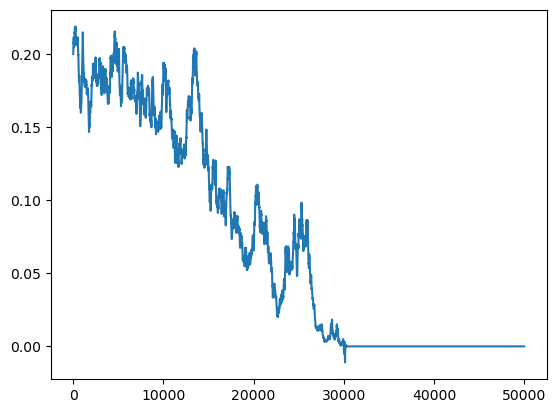

In [6]:
plt.plot(list(
    itertools.chain(*steps)
))

# MLRG Gradients

In [7]:
Js = list(torch.linspace(0, 2, 20).numpy())

deltas = []
for J_t in Js:
    
    print(f'J={J_t}')
    
    n_steps = 3

    J_s = J_t
    for i in range(n_steps):
        J_s = float(step(J_s)[-1])

    deltas.append(J_s - J_t)

J=0.0


100%|██████████████████████████████████████| 5000/5000 [00:10<00:00, 460.60it/s]


J=0.10526315867900848


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 453.40it/s]


J=0.21052631735801697


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 422.13it/s]


J=0.31578946113586426


100%|██████████████████████████████████████| 5000/5000 [00:12<00:00, 414.98it/s]


J=0.42105263471603394


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 448.74it/s]


J=0.5263158082962036


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 452.96it/s]


J=0.6315789222717285


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 421.79it/s]


J=0.7368420958518982


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 417.26it/s]


J=0.8421052694320679


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 421.97it/s]


J=0.9473684430122375


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 447.54it/s]


J=1.0526316165924072


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 445.48it/s]


J=1.1578947305679321


100%|██████████████████████████████████████| 5000/5000 [00:12<00:00, 415.62it/s]


J=1.263157844543457


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 418.39it/s]


J=1.3684210777282715


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 454.33it/s]


J=1.4736841917037964


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 447.10it/s]


J=1.5789473056793213


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 421.46it/s]


J=1.6842105388641357


100%|██████████████████████████████████████| 5000/5000 [00:12<00:00, 411.19it/s]


J=1.7894736528396606


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 453.66it/s]


J=1.894736886024475


100%|██████████████████████████████████████| 5000/5000 [00:11<00:00, 454.14it/s]


J=2.0


100%|██████████████████████████████████████| 5000/5000 [00:12<00:00, 414.80it/s]


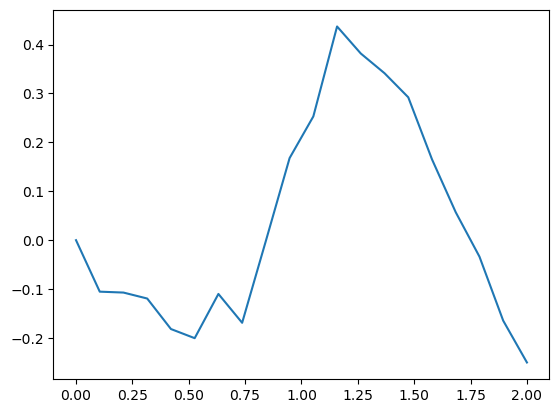

In [9]:
plt.plot(Js, deltas)